## K - NEAREST NEIGHBOR  

### __`STEP 1. IMPORT LIBRARIES`__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

<br>

### __`STEP 2. IMPORT DATASET`__

In [2]:
data = pd.read_csv('train.csv')

print("Data Imported Successfully")

Data Imported Successfully


In [3]:
# Checking Size/Dimension

data.shape

(891, 12)

In [4]:
# Checking columns

data.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# Checking first 3 records

data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


<br>

### `STEP 3. EXPLORATORY DATA ANALYSIS (EDA) / DATA EXPLORATION`

#### __` 1) VARIABLE IDENTIFICATION & TYPCASTING`__

In [6]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

> > __`TYCASTING`__

-  `Passenger ID` is unique identifier and it can be drpped as it will have uniform distribution.


-  `Survived` has two values 0 & 1. It needs to be tycasted into category or object 


-  `Pclass` has 3 variables 1, 2 & 3. It also needs to converted into category or object 


- `Sibsp`  and `Parch` can be an integer value.

In [7]:
data.drop(columns = ['PassengerId', 'Name', 'Ticket'],
          axis = 1, 
          inplace = True)

data['Survived'] = data['Survived'].astype('category')
data['Pclass']   = data['Pclass'].astype('category')

In [8]:
data.dtypes

Survived    category
Pclass      category
Sex           object
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Cabin         object
Embarked      object
dtype: object

<br>

#### __`2) UNIVARAINT ANALYSIS`__

> > __`SURVIVED`__

Nos of values :
0    549
1    342
Name: Survived, dtype: int64


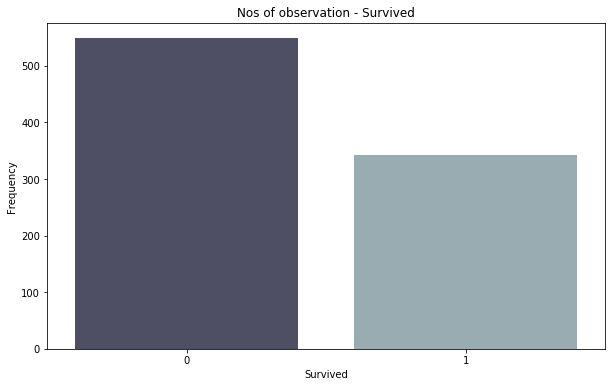

In [9]:
print("Nos of values :")
print(data['Survived'].value_counts())

plt.figure(figsize = (10,6))
sns.countplot(x = 'Survived',
              data = data,
              palette = 'bone')
plt.xlabel("Survived")
plt.ylabel("Frequency")
plt.title("Nos of observation - Survived")

plt.show()

Summary : 

 - Survival observation's are more than Death in our datatset.


> > __`PASSENGER CLASS`__

Nos of values :
3    491
1    216
2    184
Name: Pclass, dtype: int64


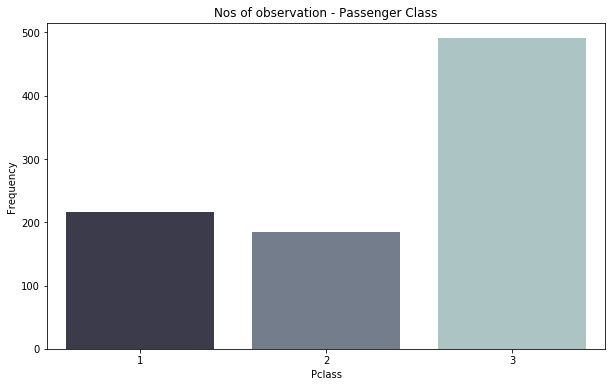

In [10]:
print("Nos of values :")
print(data['Pclass'].value_counts())

plt.figure(figsize = (10,6))
sns.countplot(x = 'Pclass',
              data = data,
              palette = 'bone')
plt.xlabel("Pclass")
plt.ylabel("Frequency")
plt.title("Nos of observation - Passenger Class")

plt.show()

Summary

 - Pclass 3 has more observation as compared to others.
 
 
 - We need to do further Bivariant Analysis and check which Pclass people survived also check with other parameters as well.

> > __`EMBARKED`__

Nos of values :
S    644
C    168
Q     77
Name: Embarked, dtype: int64


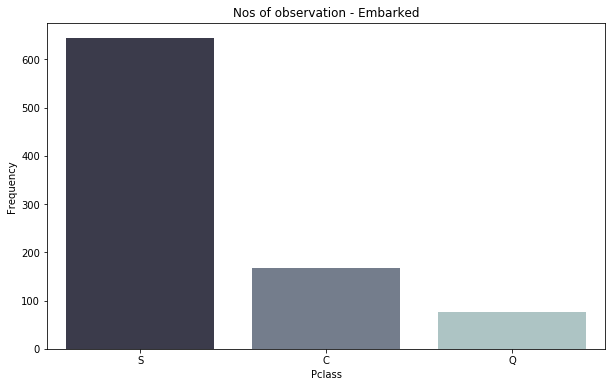

In [11]:
print("Nos of values :")
print(data['Embarked'].value_counts())

plt.figure(figsize = (10,6))
sns.countplot(x = 'Embarked',
              data = data,
              palette = 'bone')
plt.xlabel("Pclass")
plt.ylabel("Frequency")
plt.title("Nos of observation - Embarked")

plt.show()

Summary :

 - We have C = Cherbourg, Q = Queenstown, S = Southampton port where people board.
 
 
 - As per above visualization we can see that people boarded Southampthon port in large number as comapred to others.
 
 
 - Further analysis needs to be done and check which category of the people boarded which port and chdck the survival. 

> > __`SIBLINGS / SPOUSE`__

Nos of values :
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


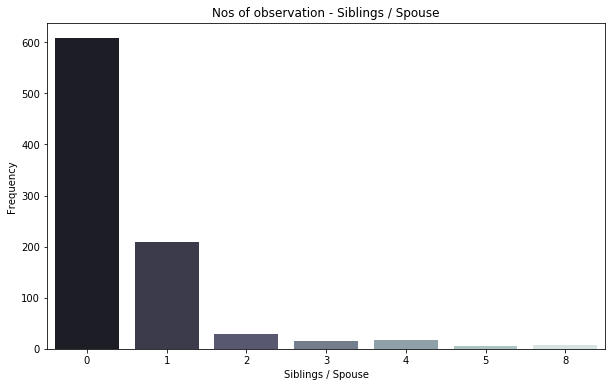

In [12]:
print("Nos of values :")
print(data['SibSp'].value_counts())

plt.figure(figsize = (10,6))
sns.countplot(x = 'SibSp',
              data = data,
              palette = 'bone')
plt.xlabel("Siblings / Spouse")
plt.ylabel("Frequency")
plt.title("Nos of observation - Siblings / Spouse")

plt.show()

Summary 

 - As per visulaization we can see that most of siblings ranges from 0 to 8 siblings


 - Most of passengers as we can see are not having any siblings followed by the passengers who have only 1 siblings as the second highest types of passengers on board.


 -  We have only 7 passengers who have the highest nos of siblings or spouse.
 
 
 - Furthers analysis needs to be done and check whether Nos of siblings / Spouse was having any effect on Survival.

 

> > __`PARENT / CHILD`__

Nos of values :
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


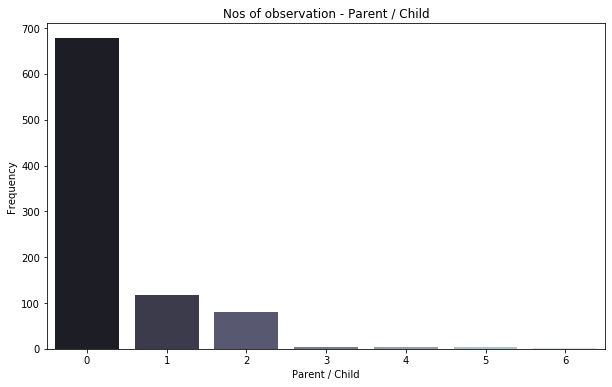

In [13]:
print("Nos of values :")
print(data['Parch'].value_counts())

plt.figure(figsize = (10,6))
sns.countplot(x = 'Parch',
              data = data,
              palette = 'bone')
plt.xlabel("Parent / Child")
plt.ylabel("Frequency")
plt.title("Nos of observation - Parent / Child")

plt.show()

Summary:
    
 - We can see that most of the childrens travel with their nanny / caretaker hence Parch = 0 observation are seen to be high (Index = 0 )
 

- We can see that only 26% of the childrens travel with their parents.


 - We need to further analyze and check, was it having any impact on survival. 

> > __`GENDER`__

In [14]:
data['Sex'].replace({
    'male' : 'Male',
    'female' : 'Female'
}, inplace  = True)

Nos of values :
Male      577
Female    314
Name: Sex, dtype: int64


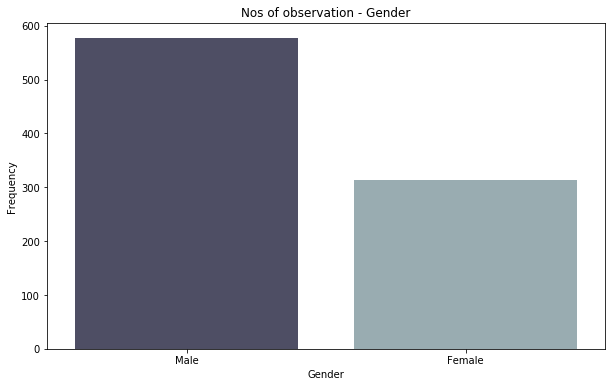

In [15]:
print("Nos of values :")
print(data['Sex'].value_counts())

plt.figure(figsize = (10,6))
sns.countplot(x = 'Sex',
              data = data,
              palette = 'bone')
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.title("Nos of observation - Gender")

plt.show()

Summary : 
    
 - As per observation we can see that there are more nos of males as compared to females.
 
 
 - We need to do further anlaysis and check if gender had any ipact on survival.

> > __`FARE`__

In [16]:
# 5 point summary

data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [17]:
print('Percent of missing "Fare" records is %.2f%%' %((data['Fare'].isnull().sum()/data.shape[0])*100))

Percent of missing "Fare" records is 0.00%


Skewness : 4.787316519674893, Kurtosis : 33.39814088089868


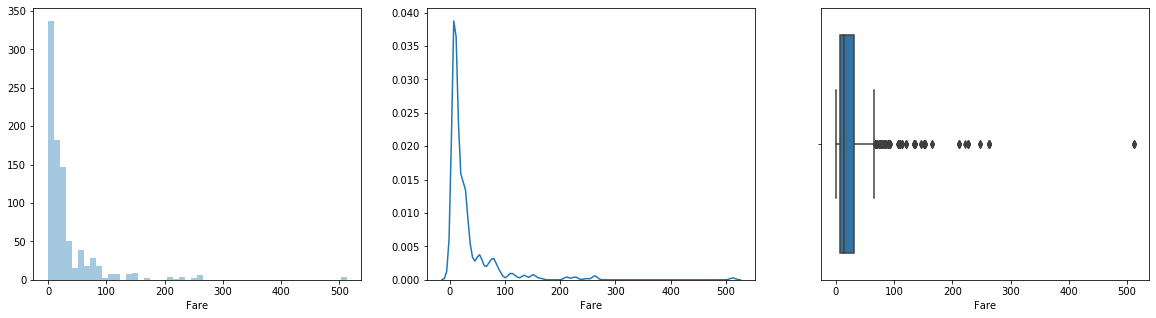

In [18]:
plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
sns.distplot(data['Fare'], kde = False)

plt.subplot(1,3,2)
sns.distplot(data['Fare'], hist = False)

plt.subplot(1,3,3)
sns.boxplot(data['Fare'], orient = 'horizontal')

print("Skewness : {}, Kurtosis : {}".format(data['Fare'].skew(), data['Fare'].kurtosis()))
plt.show()

Summary : 

 - `Skew` value is greater than 0.5 which implies that it is Right Skewed.
 
 
 - `Kurtosis` value is greater than 0 (Platykurtic) which imples that there are high chances of outlier being present.
 
 
 - We will look into this in data preprocessing step.

> > __`AGE`__

In [19]:
# 5 point summary 

data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [20]:
# Checking Missing values

print('Percent of missing "Age" records is %.2f%%' %((data['Age'].isnull().sum()/data.shape[0])*100))

Percent of missing "Age" records is 19.87%


Skewness : 0.38910778230082704, Kurtosis : 0.17827415364210353


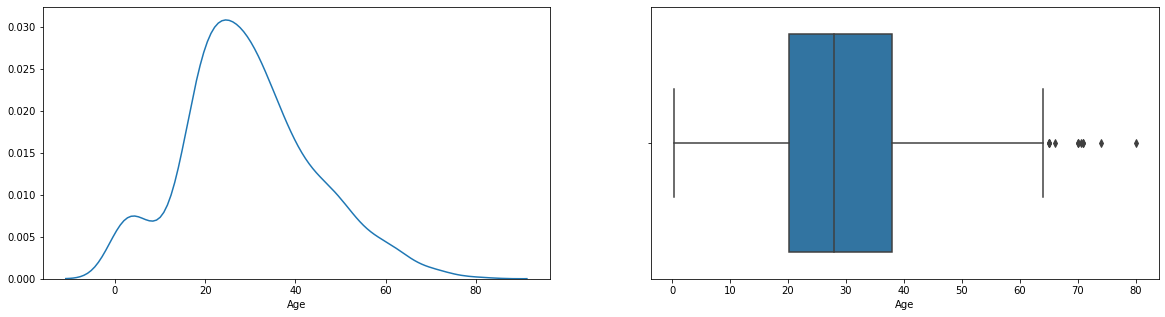

<Figure size 432x288 with 0 Axes>

In [21]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.distplot(data.Age, hist = False)

plt.subplot(1,2,2)
sns.boxplot(data.Age, orient = 'horizontal')

print("Skewness : {}, Kurtosis : {}".format(data['Age'].skew(), data['Age'].kurtosis()))

plt.show()
plt.tight_layout()

Summary : 

  - `Skewness` is between -0.5 and 0.5, so looks to be normal distribution.
     
     
  - `Kurtosis` is less than 0.5 (Platykurtic), which implies very less distribution are to be seen across tails of distribution
     
     
  - There are some outlier and missing values under the Age, which needs to be handled during Bivariant analysis and Data Preprocessing step.

In [22]:
# Checking missing values 

data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

#### `INFERENCES FROM UNIVARIANT ANALYSIS`

 - `Survived` observations where more as compared to `Death`.


 - `Pclass = 3` was observed highest number of bookings by passengers. We need to analyze further analyze teh Pclass and Survival.


 - Most of the people where boarded from `Southampton` port.
 
 
 - Most of the passengers where did not had any siblings.
 
 
 - Most of the childrens where seen to be travelling with their nanny or caretaker. Single parent (Husband or Wife) or 1 parent & 1 child total 2 passengers where also observed to some extent.
 
 
 - `Fare` and `Age` columns where having outlier's which needs to be handled in Data Preprocessing stage.
 

<br>

#### __`3) BIVARIANT ANALYSIS`__

In [23]:
data['Survived'] = data['Survived'].astype('int')

> >  __`PCLASS vs SURVIVAL`__

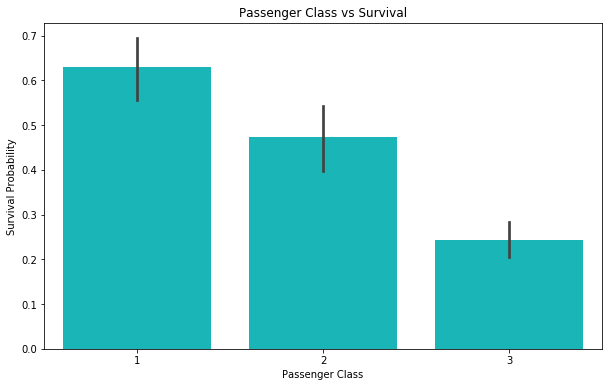

In [24]:
plt.figure(figsize = (10,6))

sns.barplot(x = 'Pclass',
            y = 'Survived',
            data = data,
            color = 'darkturquoise')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Probability')
plt.title('Passenger Class vs Survival')

plt.show()

Summary:

The graph talks about which class of passengers are more likely to survive.

As per above visualization we can see that passengers belonging to 1st class where more likely to survive inspite of more booking of Pclass 3 as we observed in univariant analysis.



> > __`GENDER vs SURVIVAL`__

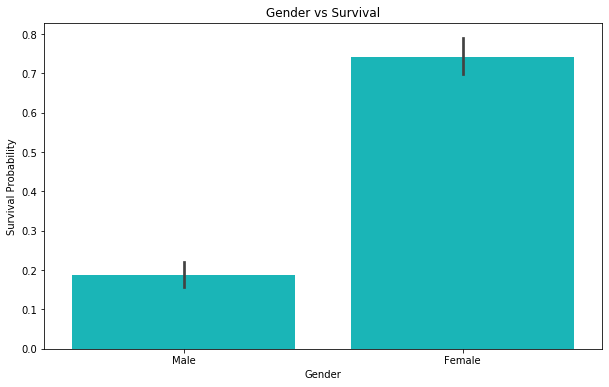

In [25]:
data['Sex'].replace({
    'male'   : 'Male',
    'female' : 'Female'
}, inplace = True)

plt.figure(figsize = (10,6))

sns.barplot(x = 'Sex',
            y = 'Survived',
            data = data,
            color = 'darkturquoise')
plt.xlabel('Gender')
plt.ylabel('Survival Probability')
plt.title('Gender vs Survival')

plt.show()

Summary : 
    
The graph talks about the chances of survival of males and females in our dataset.

As per above visualization we can see that, survival rate of females where more as compared to male's inspite of more number of males to be observed during univariant analysis.

> > __`AGE vs SURVIVAL`__

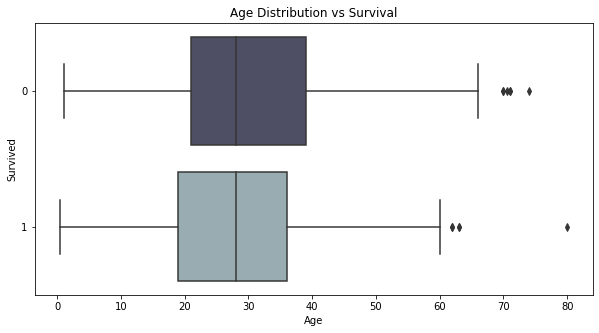

In [26]:
plt.figure(figsize = (10,5))

sns.boxplot(x = 'Age',
            y = 'Survived',
            data = data,
            palette = 'bone',
            orient = 'horizontal')
plt.title("Age Distribution vs Survival")
plt.show()

In [27]:
data_age_0 = pd.DataFrame(data.Age[data.Survived == 0], columns = ['Age'])
data_age_0.describe()

,Age
count,424.000000
mean,30.626179
std,14.172110
min,1.000000
25%,21.000000
50%,28.000000
75%,39.000000
max,74.000000


In [28]:
data_age_1 = pd.DataFrame(data.Age[data.Survived == 1], columns = ['Age'])
data_age_1.describe()

,Age
count,290.000000
mean,28.343690
std,14.950952
min,0.420000
25%,19.000000
50%,28.000000
75%,36.000000
max,80.000000


Summary :

The graph above shows the distribution of the age varibale with survival rate.


 - As per univariant analysis we could see that age was having somewhat normal distribution. The result can be seen in bivariant analysis that, there is not much any difference in mean and median is same when compared with survival variable.
 
 
 - People ranging in 20 - 40 years of age had high increase in death rate as compared to survival rate.
 

 - There where some outlier observed as well in both the cases.We will have to check further and remove the outliers as it can drastically affects the statistical significance.

> > __`FARE vs SURVIVAL`__

In [29]:
# 5 point Summary

data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

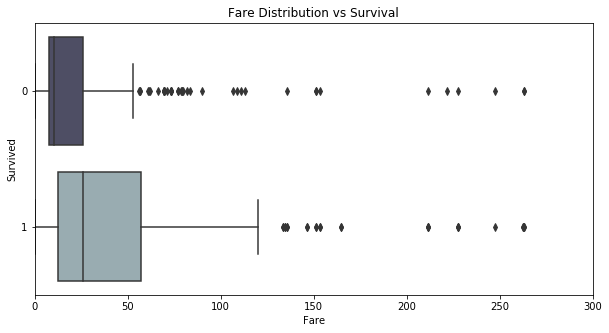

In [30]:
plt.figure(figsize = (10,5))

sns.boxplot(x = 'Fare',
            y = 'Survived',
            data = data,
            palette = 'bone',
            orient = 'horizontal')
plt.title("Fare Distribution vs Survival")
plt.xlim(0,300)
plt.show()

Summary:
    
The graph shows the distribution of Fare along with survival rate.

  - As per previous visulaization - `Pclass vs Survival` we could conclude that person's belonging to `Pclass 1` had higher chances of survival which means that they where paying more fare as compared to other pclass category people which can also be seen in `Fare vs Survival` visualization.
  

  - Suprisingly people those who pay less (belonging majorily to Pclass 3) are less likely to be survived.
  
  
  - There where some outlier observed in both the cases. We will have to check further and remove the outliers as it can drastically affects the statistical significance.

> > __`EMBARKED vs SURVIVAL`__

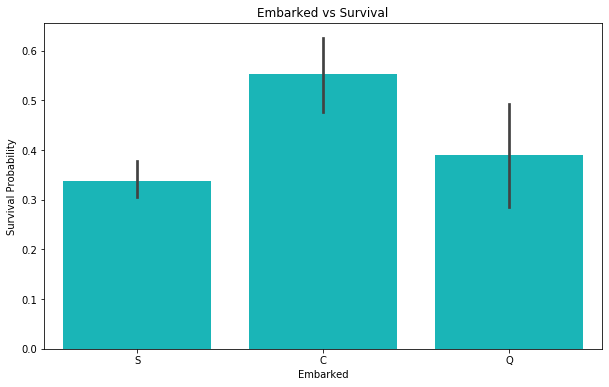

In [31]:
plt.figure(figsize = (10,6))

sns.barplot(x = 'Embarked',
            y = 'Survived',
            data = data,
            color = 'darkturquoise')
plt.xlabel('Embarked')
plt.ylabel('Survival Probability')
plt.title('Embarked vs Survival')

plt.show()

Summary : 

The graphs show the distribution of passenger's boarding at various port and their chnaces of survival.

 - As per univariant anlaysis we saw people boarded Southampton port in large number but when comparing it with Survial column it had lowest chances of survival rate.
 
 
 - Passengers who boarded in Cherbourg appear to have the highest survival rate. Passengers who boarded in Southhampton were marginally less likely to survive than those who boarded in Queenstown

#### `ADDITIONAL VARIABLE - TRAVEL ALONE`

In [32]:
data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,Male,22.0,1,0,7.2500,NaN,S
1,1,1,Female,38.0,1,0,71.2833,C85,C
2,1,3,Female,26.0,0,0,7.9250,NaN,S


> >  __`TRAVEL_ALONE vs SURVIVAL`__

In [33]:
test1  = data[['SibSp','Parch']]

travel_alone = []

for i in test1.index:
    if (test1['SibSp'][i] + test1['Parch'][i]) > 0:
        travel_alone.append(0)
    else:
        travel_alone.append(1)

test1['Travel_Alone'] = travel_alone

data.drop(columns = ['SibSp','Parch'],
          axis = 1,
          inplace = True)

data.insert(4, "Travel_Alone", travel_alone)

In [34]:
test1.head(3)

,SibSp,Parch,Travel_Alone
0,1,0,0
1,1,0,0
2,0,0,1


In [35]:
data.head(3)

,Survived,Pclass,Sex,Age,Travel_Alone,Fare,Cabin,Embarked
0,0,3,Male,22.0,0,7.2500,NaN,S
1,1,1,Female,38.0,0,71.2833,C85,C
2,1,3,Female,26.0,1,7.9250,NaN,S


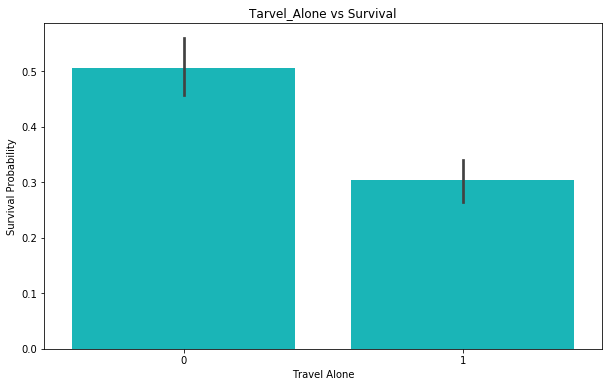

In [36]:
plt.figure(figsize = (10,6))

sns.barplot(x = 'Travel_Alone',
            y = 'Survived',
            data = data,
            color = 'darkturquoise')
plt.xlabel('Travel Alone')
plt.ylabel('Survival Probability')
plt.title('Tarvel_Alone vs Survival')

plt.show()

Summary:

The graph shows the distribution between passengers travelling alone and their survival rate.

 - As per above visualization we can see that passengers travelling alone (1) have less chances of survival as compared to travelling with family (0).
 
 
 - We can further analyze and tell that which gender prefers travelling alone and what was it's survival rate.

#### `INFERENCES FROM BIVARIANT ANALYSIS`

 - Passenger's belonging to `Pclass1 (having more fare)` where more likely to be survived. No doubt the `Pclass3` type of people recorded highest observation but their chances of survival was minimum.
 
 
 - People between `20-40 years` if age had high increase in death rate as compare to survival rate.
 
 
 - Passengers who boarded in `Cherbourg` appear to have the highest survival rate. No doubt the passengers who boarded in `Southhampton` port where observed to be highest but they where less likely to survive than those who boarded in `Queenstown`.
 
 
 - Passenger's who travelled alone where less likely to survive compared to those who are travelling with parents.
 
 
 - `Multivariant Analysis` needs to be performed to get more insights from the data if present.

In [37]:
data.isnull().sum()

Survived          0
Pclass            0
Sex               0
Age             177
Travel_Alone      0
Fare              0
Cabin           687
Embarked          2
dtype: int64

<br>

#### ` 4). MULTIVARIANT ANALYSIS`

In [38]:
data['Survived'] = data['Survived'].astype('object')
data['Pclass'] = data['Pclass'].astype('object')
data['Travel_Alone'] = data['Travel_Alone'].astype('object')

> > __`GENDER vs PCLASS vs SURVIVED`__

In [39]:
pd.crosstab(index = data['Survived'], columns = [data['Pclass'], data['Sex']], )

Pclass        1           2           3     
Sex      Female Male Female Male Female Male
Survived                                    
0             3   77      6   91     72  300
1            91   45     70   17     72   47

Summary:

 - Death Rate:
       - Highest (Males   - Pclass3)
       - Lowest  (Females - Pclass1)
       
 - Survival Rate:
       - Highest (Females - Pclass1)
       - Lowest  (Males   - Pclass2)
       
 
 - `Pclass vs Survival`  told us that Pclass1 had high survival rate. `Gender vs Survival` told us that females where more likely to survive than male. All this hold's true and can been seen from above data represented via crosstab.

> > __`TRAVEL_ALONE vs SURVIVED vs PCLASS vs GENDER`__

In [40]:
data.Travel_Alone.value_counts()

1    537
0    354
Name: Travel_Alone, dtype: int64

In [41]:
pd.crosstab(index = [data['Survived'],data['Travel_Alone']], columns = [data['Pclass'],data['Sex']])

Pclass                     1           2           3     
Sex                   Female Male Female Male Female Male
Survived Travel_Alone                                    
0        0                 2   27      3   26     49   68
         1                 1   50      3   65     23  232
1        0                58   20     41   10     35   15
         1                33   25     29    7     37   32

Q) `How many passengers liked to travel alone ?`

      - Out of 891 observations there where 537 such passengers who liked to travel alone.

Q) `Which Pclass had the highest / lowest travelling alone passengers  OR Females or Males?`

      - `Pclass3` recorded highest number of passengers travelling alone.
      
      - `Pclass2` recorded lowest number of passengers travelling alone.

Q) `How many travel alone passengers where survived ?`

      -Out of 891 observations there where 163 such passengers who where travelling alone survived the pandemic. Highest was from Pclass3 and lowest was from Pclass2.
     
     

<br>

#### `CONCLUSION  - EXPLORATORY DATA ANALYSIS`

 - `Pclass1` had higher chances of survival. `Pclass3` recorded more death rate.
 
 
  - Most of the `Age Group` or `Gender` preferred travelling in Pclass3.
 
      
  - 60% of our dataset liked travelling alone and out of those 60%, 30% survived and belong to Pclass3 where Females outraged Male and 30% could'nt survive the pandemic.
 
      
  - People who spend more on luxary hospitality services (More Fare and Pclass1) where seem to have high survival rate.
 
      
  - Passengers boarding `Cherbourg` recorded highest survival rate. Passengers who boarded in `Southhampton` were less likely to survive than those who boarded in `Queenstown`.
 
 
  - There where `outliers` to be seen in our dataset for `Age` and `Fare` column. We also recorded `missing values`  for `Age`, `Cabin` an `Embarked`. This all needs to adressed in Data Preprocessing phase.

<Br>

### `STEP 4. DATA PREPROCESSING`

#### `1) MISSING VALUES`

In [42]:
data.isnull().sum()

Survived          0
Pclass            0
Sex               0
Age             177
Travel_Alone      0
Fare              0
Cabin           687
Embarked          2
dtype: int64

> >  __`AGE`__

In [43]:
print('Percent of missing "Age" records is : {}'.format((data['Age'].isnull().sum()/data.shape[0])*100))

Percent of missing "Age" records is : 19.865319865319865


In [44]:
print("Passenger's avg age belonging to class 1 : {}".format(data.Age[(data.Pclass == 1)].mean()))
print("Passenger's avg age belonging to class 2 : {}".format(data.Age[(data.Pclass == 2)].mean()))
print("Passenger's avg age belonging to class 3 : {}".format(data.Age[(data.Pclass == 3)].mean()))

Passenger's avg age belonging to class 1 : 38.233440860215055
Passenger's avg age belonging to class 2 : 29.87763005780347
Passenger's avg age belonging to class 3 : 25.14061971830986


In [45]:
print('Percent of missing "Age" records is : {}'.format((data['Age'].isnull().sum()/data.shape[0])*100))

test1 = data[['Pclass', 'Age']]

test1['Age'].fillna(value = 0,
                    inplace = True)

for i in test1.index:
    if test1['Age'][i] == 0 and test1['Pclass'][i] == 1:
        test1['Age'][i] = 38
    elif test1['Age'][i] == 0 and test1['Pclass'][i] == 2:
        test1['Age'][i] = 30
    elif test1['Age'][i] == 0 and test1['Pclass'][i] == 3:
        test1['Age'][i] = 25
    else:
        test1['Age'][i] = test1['Age'][i]
      

list_age = test1['Age']

data.drop(columns = ['Age'],
          axis = 1,
          inplace = True)

data.insert(3, 'Age', list_age)


print('Percent of missing "Age" records is : {}'.format((data['Age'].isnull().sum()/data.shape[0])*100))

Percent of missing "Age" records is : 19.865319865319865
Percent of missing "Age" records is : 0.0


> > __`EMBARKED`__

In [46]:
data[(data['Embarked'].isnull())]

,Survived,Pclass,Sex,Age,Travel_Alone,Fare,Cabin,Embarked
61,1,1,Female,38.0,1,80.0,B28,NaN
829,1,1,Female,62.0,1,80.0,B28,NaN


In [47]:
data['Embarked'].value_counts().idxmax()

'S'

In [48]:
print('Percent of missing "Embarked" records is : {}'.format((data['Embarked'].isnull().sum()/data.shape[0])*100))
data['Embarked'].fillna(value = data['Embarked'].value_counts().idxmax(), inplace = True)
print('Percent of missing "Embarked" records is : {}'.format((data['Embarked'].isnull().sum()/data.shape[0])*100))

Percent of missing "Embarked" records is : 0.22446689113355783
Percent of missing "Embarked" records is : 0.0


> > __`CABIN (1 - No Cabin, 0 - Cabin)`__

In [49]:
print('Percent of missing "Cabin" records is : {}'.format((data['Cabin'].isnull().sum()/data.shape[0])*100))

Percent of missing "Cabin" records is : 77.10437710437711


In [50]:
print('Percent of missing "Cabin" records is : {}'.format((data['Cabin'].isnull().sum()/data.shape[0])*100))

test2 = data[['Cabin']]

test2['Cabin'].fillna(value = 0,
                      inplace = True)

for i in test2.index:
    if test2['Cabin'][i] == 0:
        test2['Cabin'][i] = 1
    else:
        test2['Cabin'][i] = 0

list_cabin = test2['Cabin']

data.drop(columns = ['Cabin'],
          axis = 1,
          inplace = True)

data.insert(6, "Cabin", list_cabin)

print('Percent of missing "Cabin" records is : {}'.format((data['Cabin'].isnull().sum()/data.shape[0])*100))

Percent of missing "Cabin" records is : 77.10437710437711
Percent of missing "Cabin" records is : 0.0


In [51]:
pd.crosstab(index = [data['Survived'], data['Cabin']], columns = data['Pclass'])

Pclass            1   2    3
Survived Cabin              
0        0       59   3    6
         1       21  94  366
1        0      117  13    6
         1       19  74  113

In [52]:
data.Cabin.value_counts()

1    687
0    204
Name: Cabin, dtype: int64

Q) `How many passengers survived those who had a cabin ?`

        - Out of 891 passengers, 204 passengers where having cabin. Out of 204, 136 passengers (117 + 13 + 6) survived. Also we can obsere that most of passengers from 136 belonged to Pclass1. There where hardly few passengers to be seen in Pclass2 and Pclass3 having Cabin.

<br>

#### __`2) CATEGORICAL VALUE`__

In [53]:
# Sex and Embarked column needs to be handled.

data_copy = data.copy()

data = pd.get_dummies(data, columns = ['Embarked', 'Sex'])

In [54]:
col_list = data.columns.tolist()
col_list

['Survived',
 'Pclass',
 'Age',
 'Travel_Alone',
 'Fare',
 'Cabin',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Sex_Female',
 'Sex_Male']

In [55]:
# Avoiding dummy varibale trap. (Gender: 1 - Male, 0 - Female)

col_list = data.columns.tolist()

col_list = [ 
 'Pclass',
 'Age',
 'Travel_Alone',
 'Fare',
 'Cabin',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Sex_Female',
 'Sex_Male',
 'Survived']

data = data[col_list]

data.drop(columns = ['Embarked_S','Sex_Female'],
          axis = 1,
          inplace = True)

data.rename(columns = {
    'Sex_Male' : 'Gender'
}, inplace = True)

data.head(3)

,Pclass,Age,Travel_Alone,Fare,Cabin,Embarked_C,Embarked_Q,Gender,Survived
0,3,22.0,0,7.2500,1,0,0,1,0
1,1,38.0,0,71.2833,0,1,0,0,1
2,3,26.0,1,7.9250,1,0,0,0,1


<br>

#### `3) OUTLIER VALUE `

......BEFORE......
Data Shape: (891, 9)

Skewness: 4.787316519674893, Kurtosis: 33.39814088089868


......AFTER......
Data Shape: (775, 9)

Skewness: 1.4306715336945985, Kurtosis: 1.472671984866464


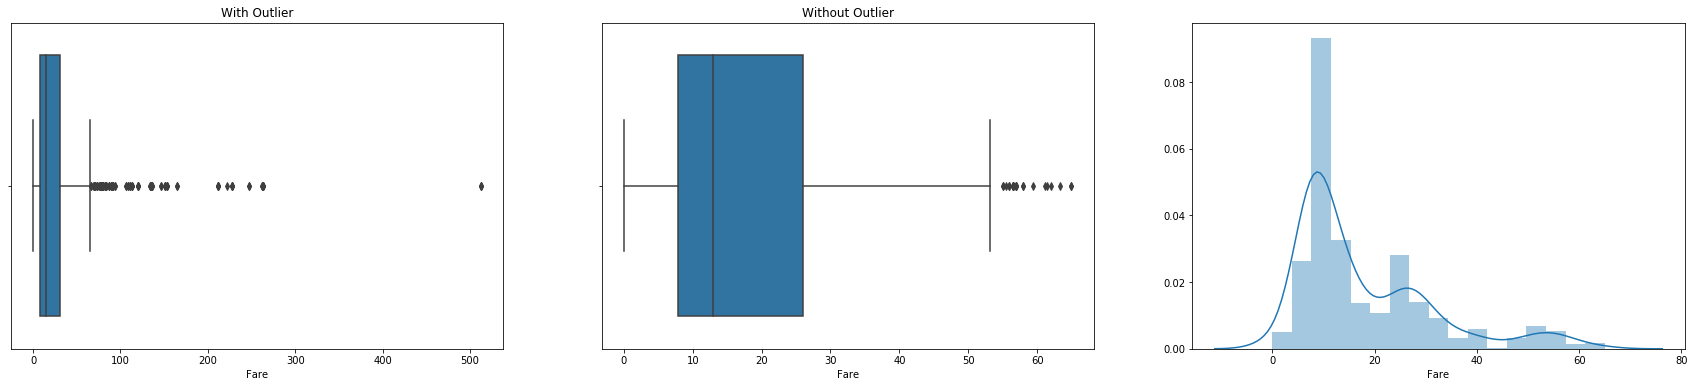

<Figure size 432x288 with 0 Axes>

In [56]:
plt.figure(figsize = (30,6))

# Before Removing Outlier
plt.subplot(1,3,1)
plt.title('With Outlier')
sns.boxplot(x=data['Fare'])

# Identifying the quantile range 
Q1  = data['Fare'].quantile(0.25)
Q3  = data['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Removing the outlier range 
data1 = data[~((data['Fare'] < (Q1 - 1.5 * IQR)) |(data['Fare'] > (Q3 + 1.5 * IQR)))]

# After removing the outlier
plt.subplot(1,3,2)
plt.title('Without Outlier')
sns.boxplot(x=data1['Fare'])

# Distribution  After
plt.subplot(1,3,3)
sns.distplot(data1['Fare']);

print("......BEFORE......")
print("Data Shape: {}".format(data.shape))
print("\nSkewness: {}, Kurtosis: {}".format(data['Fare'].skew(), data['Fare'].kurtosis()))
print("\n")
print("......AFTER......")
print("Data Shape: {}".format(data1.shape))
print("\nSkewness: {}, Kurtosis: {}".format(data1['Fare'].skew(), data1['Fare'].kurtosis()))


plt.show()
plt.tight_layout()

In [57]:
data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [58]:
data1.Fare.describe()

count    775.000000
mean      17.822091
std       13.578085
min        0.000000
25%        7.895800
50%       13.000000
75%       26.000000
max       65.000000
Name: Fare, dtype: float64

Summary : 

 - `Skewness` reduced from 4.7 to 1.4 making it look alike right skewed distribution.
 
 
 - `Kurtosis` reduced from 33 to 1.5 having less values distributed along the tails.
 
 
 - `Fare` varibale range, mean, median also reduced and was in compareable range.
 
 
 -  We could not completely remove the outlier but brought the data in comparable range.

<br>

### `STEP 5. PREDICTIVE MODELLING / MODEL BUILDING` 

In [59]:
data1.head(3)

,Pclass,Age,Travel_Alone,Fare,Cabin,Embarked_C,Embarked_Q,Gender,Survived
0,3,22.0,0,7.250,1,0,0,1,0
2,3,26.0,1,7.925,1,0,0,0,1
3,1,35.0,0,53.100,0,0,0,0,1


In [60]:
data1.dtypes

Pclass           object
Age             float64
Travel_Alone     object
Fare            float64
Cabin            object
Embarked_C        uint8
Embarked_Q        uint8
Gender            uint8
Survived         object
dtype: object

In [61]:
data1['Survived'] = data1['Survived'].astype('int')

#### `SPLITTING DATA - INDEPENDENT & DEPENDENT VARIABLES`

In [62]:
X = data1.iloc[:, 0:8].values
y = data1.iloc[:, 8:9].values

#### `SPLITTING DATA - TRAINING & TEST`

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 40, shuffle = True, stratify = y)

#### `FEATURE SCALING`

In [64]:
from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)
X_test = x_scaler.transform(X_test)

#### `BUILDING MODEL`

In [65]:
# Importing the class from module 
from sklearn.neighbors import KNeighborsClassifier

# Creating instance of class
model = KNeighborsClassifier(n_neighbors=5)

# Fitting model - train & test data.
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#### `PREDICTING RESULTS & EVALUATING`

In [66]:
# Predicting results
y_pred = model.predict(X_test)

# Calculating accuracy & Classification Report
from sklearn.metrics import accuracy_score,classification_report
print("Accuracy of KNN model : {}".format(accuracy_score(y_pred,y_test)*100), "\n")

print("\t\t\tCLASSIFICATION REPORT:\n")
print(classification_report(y_pred, y_test))

Accuracy of KNN model : 87.09677419354838 

			CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       102
           1       0.81      0.81      0.81        53

    accuracy                           0.87       155
   macro avg       0.86      0.86      0.86       155
weighted avg       0.87      0.87      0.87       155



<br>

### `STEP 6. MODEL EVALUATION`

#### `DEFINING K-VALUES`

Text(0, 0.5, 'Error Rate')

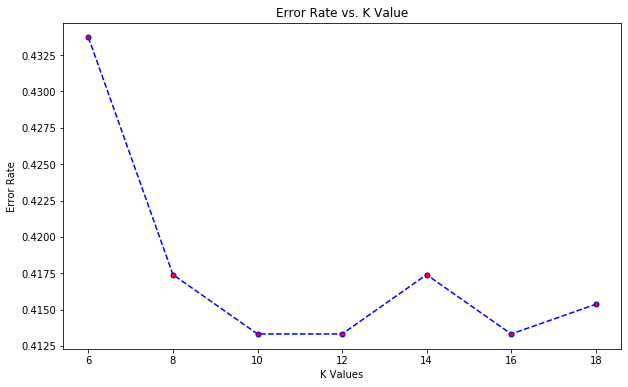

In [67]:
error_rate = []
for i in range(6,20,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(6,20,2),error_rate,color='blue',linestyle='dashed', marker='o', markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Values')
plt.ylabel('Error Rate')

Reference : https://medium.com/@moussadoumbia_90919/elbow-method-in-supervised-learning-optimal-k-value-99d425f229e7#:~:text=Elbow%20Method%20in%20Supervised%20Machine%20Learning(Optimal%20K%20Value),-Moussa%20Doumbia&text=Elbow%20method%20helps%20data%20scientists,this%20optimal%20value%20of%20K. 

#### `VISULIZING UNDERFITTING / OVERFITTING`

In [68]:
from sklearn.metrics import f1_score

In [69]:
def F1score(K):
    '''
  Takes an input K consisting of a range of K values for KNN
  Input:
  K = list
  
  Returns: lists containing F1 corresponding to every value of K
  train_f1 = list of train f1 score corresponding K
  test_f1  = list of test f1 score corresponding to K
    '''
    # initiating empty list
    train_f1 = []
    test_f1  = []
  
    # training model for every value of K
    for i in K:
        
        # Instance oh KNN
        clf  =KNeighborsClassifier(n_neighbors = i)
        clf.fit(X_train, y_train)
        
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(X_train)
        tmp = f1_score(tmp,y_train)
        train_f1.append(tmp)
    
        tmp = clf.predict(X_test)
        tmp = f1_score(tmp,y_test)
        test_f1.append(tmp)
    
    return train_f1, test_f1

In [70]:
# Defining range of K 

K = range(1,150)

In [71]:
# Calculating F1score on Training & Test

train_f1, test_f1 = F1score(K)

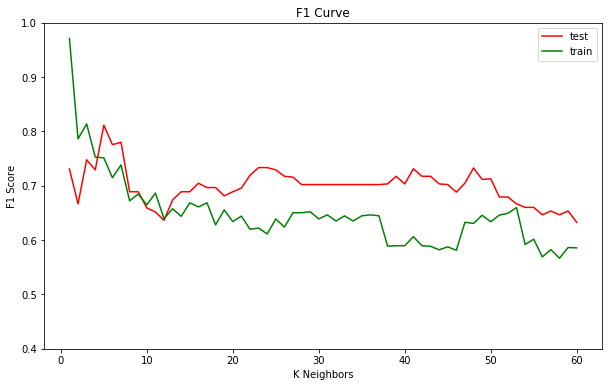

In [72]:
# Plotting 

plt.figure(figsize=(10,6))
plt.plot(K[0:60], test_f1[0:60], color = 'red' , label = 'test')
plt.plot(K[0:60], train_f1[0:60], color = 'green', label = 'train')
plt.xlabel('K Neighbors')
plt.ylabel('F1 Score')
plt.title('F1 Curve')
plt.ylim(0.4,1)
plt.legend(loc = 'upper_left', bbox_to_anchor = (1,1))

Summary: 
    
   - We can see that for lower value of K between 0-5 model performs wll on training data but has poor performance on test data which accounts for `Overfitting`.
    
    
   - Values of K ranging from 5-12(approx) saw a better performance of test data over training data. We could say that error was minimum for teh values of K ranfging between 5-12.
    
    
   - Large value of K observed `Underitting`. 

In [73]:
data.head()

,Pclass,Age,Travel_Alone,Fare,Cabin,Embarked_C,Embarked_Q,Gender,Survived
0,3,22.0,0,7.2500,1,0,0,1,0
1,1,38.0,0,71.2833,0,1,0,0,1
2,3,26.0,1,7.9250,1,0,0,0,1
3,1,35.0,0,53.1000,0,0,0,0,1
4,3,35.0,1,8.0500,1,0,0,1,0


<br>

### `STEP 7. MODEL TESTING`

In [74]:
# Prediction 1

print(model.predict(x_scaler.transform([[3,22,0,7.25,1,0,0,1]])))

[0]


In [75]:
 # Prediction 2

print(model.predict(x_scaler.transform([[1,34,0,53,1,0,0,0]])))

[1]


<br>

### `CHECKING CONSISTENCY -  K Fold Cross Validation`

- We where plotting F1 - scores against various values of K along the X axis. It performed well on training data and not that good on test data and based on this result we where just selecting the optimum value of K for our algorithm. 


- We where not evaluating our model based on unseen data. If we tried to did it, it may or may not give us the generalized result which can sometimes be dangerous.


- We have the concept of validation data which is just another subset of training data and is used for optimizing the model instead of test data. Test data which is not seen at all by the model is just used for final evaluation purpose.


- We have following methods for optimizing the model and creating validation set.

        1) Hold Out Validation.
        2) Stratified Hold Out Validation.
        3) Leave One Out Validation.
        4) K Fold Cross Validation.
        
        
 - `Hold Out Validation` randomly splits the data into training and validation set . There can be chances of class imbalance so to avoid class imbalance issue we have `Stratified Hold Out Validation` where we mention `stratify = y` parameter which divides the distribution in such a manner that training and validation data have equal proporation of class labels. But it requires a good amount of data to be kept aside for validation and training which cannot be acheived when dataset is small. So to address this issue we have `K Fold Cross Validation`.
 
 
 - Ideally the value of K should be between `5 < K < 10`. Value of K > 10 results in creating more model / groups. When we have K = number of observation (K = n) it belongs to `Leave One Out Validation`. For different values of K we compute score and at last we take mean of all values. Higher the means tells us that better is the model. Also for better consistency the score should not vary much so we calculate standard deviation as well.

In [76]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(KNeighborsClassifier(n_neighbors = 5), X_train, y_train, cv=10)
print("Mean : {}, Standard Deviation : {}".format(score.mean()*100, score.std()*100))

Mean : 78.06451612903224, Standard Deviation : 5.956833971812707


In [77]:
def Val_Score(n_neighbors):
    
    avg = []
    std = []
    
    for i in n_neighbors:
        
        # 10 fold cross validation for every value of neighbors
        score  = cross_val_score(KNeighborsClassifier(n_neighbors = i), X_train, y_train, cv = 10)
        
        # Calculating average
        avg.append(score.mean())
        
        # Calucating Standard Deviation
        std.append(score.std())
        
    return avg, std

In [80]:
n_neighbors = range(1,50)

avg, std = Val_Score(n_neighbors)

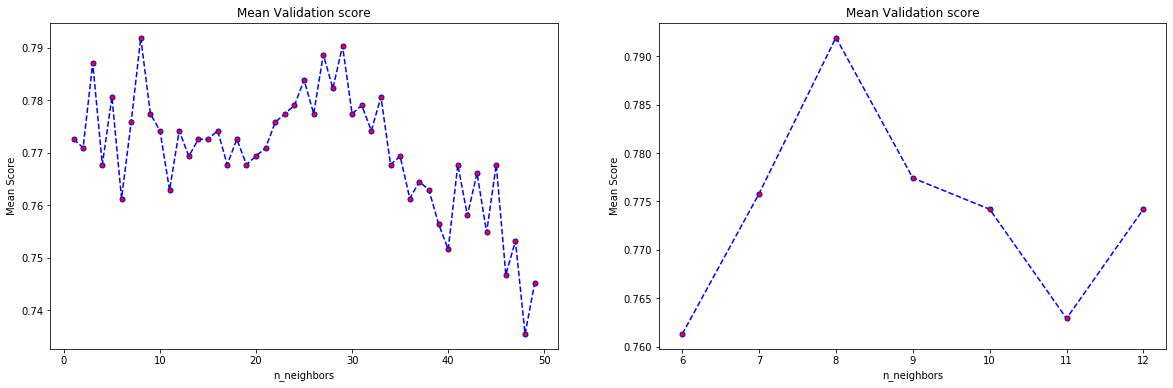

<Figure size 432x288 with 0 Axes>

In [85]:
# Plotting Mean 

plt.figure(figsize = (20,6))

plt.subplot(1,2,1)
plt.plot(n_neighbors, avg, label = 'avg', color='blue',linestyle='dashed', marker='o', markerfacecolor='red', markersize=5)
plt.xlabel('n_neighbors')
plt.ylabel('Mean Score')
plt.title('Mean Validation score')

plt.subplot(1,2,2)
plt.plot(n_neighbors[5:12], avg[5:12], label = 'avg', color='blue',linestyle='dashed', marker='o', markerfacecolor='red', markersize=5)
plt.xlabel('n_neighbors')
plt.ylabel('Mean Score')
plt.title('Mean Validation score')

plt.show()
plt.tight_layout()

Summary:

- As per above visualization we could observe high mean for the values ranging between 5-12.


- On further analysis, we could observe `n_neigbours = 8` acheived high mean.

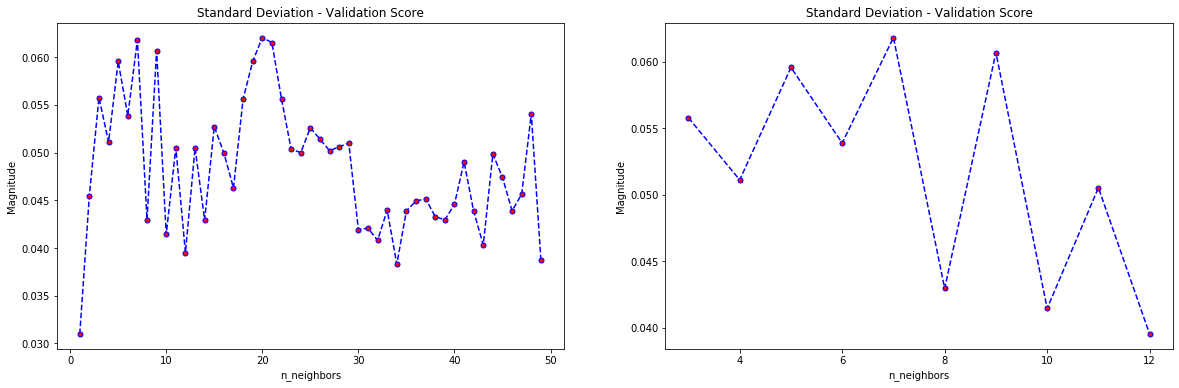

<Figure size 432x288 with 0 Axes>

In [90]:
# Plotting Standard Deviation

plt.figure(figsize = (20,6))

plt.subplot(1,2,1)
plt.plot(n_neighbors, std, label = 'std', color='blue',linestyle='dashed', marker='o', markerfacecolor='red', markersize=5)
plt.xlabel('n_neighbors')
plt.ylabel('Magnitude')
plt.title('Standard Deviation - Validation Score')

plt.subplot(1,2,2)
plt.plot(n_neighbors[2:12], std[2:12], label = 'std', color='blue',linestyle='dashed', marker='o', markerfacecolor='red', markersize=5)
plt.xlabel('n_neighbors')
plt.ylabel('Magnitude')
plt.title('Standard Deviation - Validation Score')

plt.show()
plt.tight_layout()

Summary:

- As per above visualization we can see that standard deviation of n_neighbour = 8 is low and mean was high which can make us to conclude that model generalized at n_neighbour = 8.


- The mean for n_neighbour 10 and 12 was same but less than n_neighbour = 8. Model looks to be consistent and stable for n_neigbors = 12 but it's mean value for scores is not that good. So, if we are focusing on accuracy  choosing `n_neighbors = 8  will give better accuracy` but choosing `n_neighbors = 12 will give us consitent and stable model`.

In [91]:
# N_Neighbors = 8 

score = cross_val_score(KNeighborsClassifier(n_neighbors = 8), X_train, y_train, cv=10)
print("Mean : {}, Standard Deviation : {}".format(score.mean()*100, score.std()*100))

Mean : 79.19354838709677, Standard Deviation : 4.294686114740112


In [92]:
# N_Neighbors = 12

score = cross_val_score(KNeighborsClassifier(n_neighbors = 12), X_train, y_train, cv=10)
print("Mean : {}, Standard Deviation : {}".format(score.mean()*100, score.std()*100))

Mean : 77.41935483870968, Standard Deviation : 3.9507899077148037


So here we used `validation data` for choosing optimum value of K. Using the optimum value of K we built our model now and evaluate on Test test which our model has'nt seen.

#### `TESTING - (K = 8 & K = 12)`

In [94]:
# N_Neigbours = 8

model1 = KNeighborsClassifier(n_neighbors = 8)
model1.fit(X_train, y_train)

# Predicting Test Result
y_pred1 = model1.predict(X_test)

# Calculating Accuracy
print("Accuracy of KNN model : {}".format(accuracy_score(y_pred1,y_test)*100), "\n")

Accuracy of KNN model : 81.93548387096774 



In [95]:
# N_Neigbours = 12

model1 = KNeighborsClassifier(n_neighbors = 12)
model1.fit(X_train, y_train)

# Predicting Test Result
y_pred1 = model1.predict(X_test)

# Calculating Accuracy
print("Accuracy of KNN model : {}".format(accuracy_score(y_pred1,y_test)*100), "\n")

Accuracy of KNN model : 79.35483870967742 



Summary:
   
We acheived an avg accuracy of `80.645 %` over test data for n_neigbours 8 and 12.